### Тема проекта: 
Выявить определяющие успешность игры закономерности. 

### Цель проекта: 
Сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

### Описание данных
 

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    

### План
1. Смотрим датасеты ищем ошибки и дубликаты подготавливаем данные

2. Проведите исследовательский анализ данных

3. Составьте портрет пользователя каждого региона
   
4. Проверьте гипотезы

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from statistics import mean
pd.options.display.max_colwidth = 100


In [2]:
games = pd.read_csv('/datasets/games.csv') 
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Изучение данных из файла

### Предобработка данных
- Замените названия столбцов (приведите к нижнему регистру)
- Удалим дубликаты
- Преобразуйте данные в нужные типы
- Обработайте пропуски при необходимости
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [3]:
games.columns = [x.lower() for x in games.columns] #  но проще (с точки зрения количества кода) сделать это через str.lower().
games.columns



Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
#games = games.rename(columns={'Name': 'name'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'Platform': 'platform'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'Year_of_Release': 'year_of_release'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'Genre': 'genre'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'NA_sales': 'na_sales'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'EU_sales': 'eu_sales'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'JP_sales': 'jp_sales'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'Other_sales': 'other_sales'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'Critic_Score': 'critic_score'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'User_Score': 'user_score'}) # переименование столбцов для нижнего регистра
#games = games.rename(columns={'Rating': 'rating'}) # переименование столбцов для нижнего регистра
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
display((games.sort_values(by ='year_of_release', ascending=False)).head(10))
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,winning post 8 2016,psv,2016.0,simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
14400,dirt rally,pc,2016.0,racing,0.00,0.03,0.00,0.00,86.0,8.7,E
2024,nba 2k17,xone,2016.0,sports,0.86,0.06,0.00,0.11,90.0,6.2,E
15456,carmageddon: max damage,xone,2016.0,action,0.01,0.01,0.00,0.00,52.0,7.1,M
14385,tokyo xanadu ex+,ps4,2016.0,role-playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
921,nba 2k17,ps4,2016.0,sports,1.25,0.27,0.02,0.34,88.0,6.7,E
15143,toukiden 2,ps3,2016.0,action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13214,metroid prime: federation force,3ds,2016.0,action,0.02,0.01,0.01,0.00,64.0,5.1,T
16188,darksiders: warmastered edition,xone,2016.0,action,0.01,0.00,0.00,0.00,80.0,7.9,M
11512,pro cycling manager 2016,ps4,2016.0,sports,0.00,0.07,0.00,0.01,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
duplicated_games = games[games.duplicated(keep=False)].head(30)
#проверяем на дубликаты дубликатов не обнаруженно

display(duplicated_games) 
display(duplicated_games.duplicated().sum())
#дубликатов нет

round((games.isna().mean()*100),2)
round((games.isnull().mean()*100),2)
#проверить на isna() или isnull()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


0

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [6]:
games['name'] = games['name'].fillna('unknown_game_of_gen') # дадим условное название
games[games['platform'] == 'GEN'].head() # замена пропусков 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [7]:
#  85 записей можно удалить информации просто 0  избавимся от пропусков в датах
# и платформы и жанры мы удалим это не нарушит целостности
a = games[(games['year_of_release'].isna() == True) &
          
          (games['critic_score'].isna()    == True) & 
          (games['user_score'].isna()      == True) &
         (games['rating'].isna()           == True)]

games[games['year_of_release'].isnull() == True]


games.dropna(subset=['year_of_release'], inplace = True)

In [8]:
games[games['genre'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown_game_of_gen,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown_game_of_gen,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
games['genre'] = games['genre'].fillna('unknown_genre')

In [10]:
games.shape

(16446, 11)

In [11]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [12]:
ESRB = games.groupby(['platform', 'rating']).agg({'rating': 'count'})



    
    - мы заменили названия 2 игр платформы GEN на условные
    - нет оценок критиков, пользователей и рейтингов для почти половины строк чтобы сохранить целостность удалять не будем
    - удалены строки с пропущенными датами. строк всего 269, и это не окажет существенного влияния
    - строки с пропущенными значениями в поле genre мы так же обозачим условно, но удалять не будем
 

### Причины, которые могли привести к пропускам;

        - беглое заполнение таблицы
        - реальное отсутствие информации
        - механическая ошибка, плохая передача данных

### Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать;

In [13]:
display(((games['user_score'].value_counts()).sort_values(ascending=False)).head(10))

#games['user_score'] = games['user_score'].astype('int64')
#games.info() #приводим к типам данных инт

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
7.7     236
Name: user_score, dtype: int64

        - tbd- "подлежит уточнению"- посути это NAN гугл нам помог

In [14]:
games['user_score'] = games['user_score'].str.replace('tbd', '0')



### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [16]:
# годы даны как простые числа. Месяцы значения не имеют, поэтому нет смысла приводить их в формат datetime
games['year_of_release'] = games['year_of_release'].astype('int')

In [17]:
games['user_score'] = games['user_score'].astype('float64')
games.info() #приводим к типам данных float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [19]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Шаг 3. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [20]:
games.shape

(16446, 12)

In [21]:
games['name'].nunique()

11427

In [22]:
b=games.duplicated(subset=['name', 'year_of_release'])
b.shape # парных дубликатов год-имя не обнаружено

(16446,)

In [23]:
games_by_years = games.groupby('year_of_release').agg(
    {'name': 'count'}).reset_index()

In [24]:
games_by_years.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


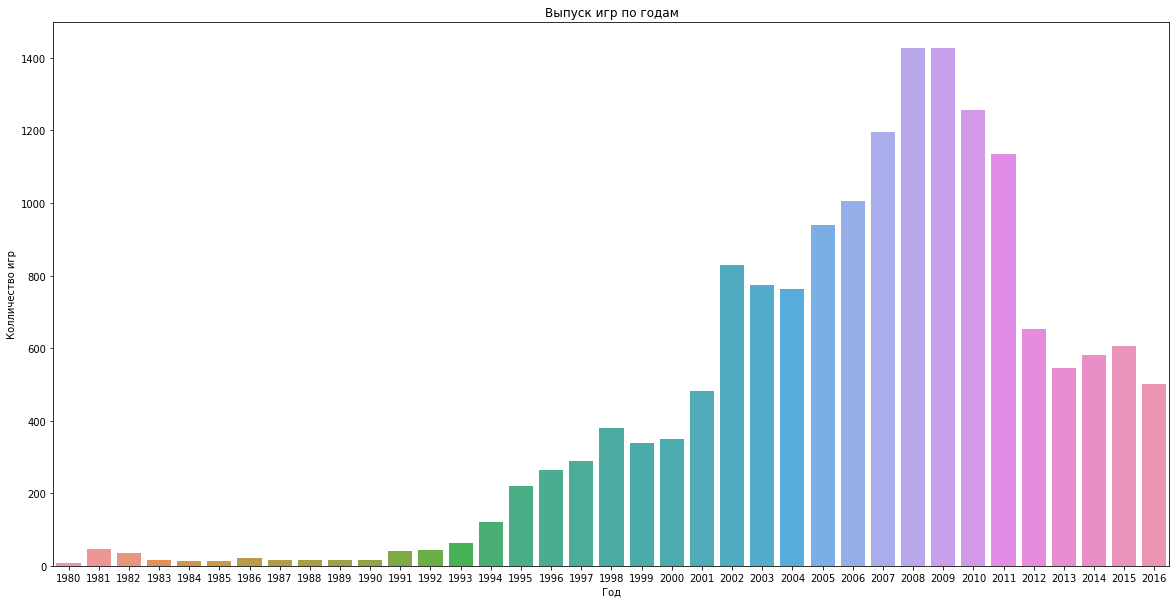

In [25]:
plt.figure(figsize = (20,10))

sns.barplot(x='year_of_release',
            y='name',
            data=games_by_years)

plt.xlabel('Год')
plt.ylabel('Колличество игр')
plt.title('Выпуск игр по годам')
plt.show()


    
    -динамика в выпуске игр начинает меняться с 2008 года 
    
    - с 2011 года количество выпускаемых игр снижается видимо спрос упал 

### Посмотрм, как менялись продажи по платформам.Выберем платформы с наибольшими суммарными продажами и построем распределение по годам.

In [26]:
platforms = pd.pivot_table(games,
                           values = 'total_sales',
                           index = 'platform',
                           aggfunc = np.sum).sort_values(
     'total_sales', ascending=False)

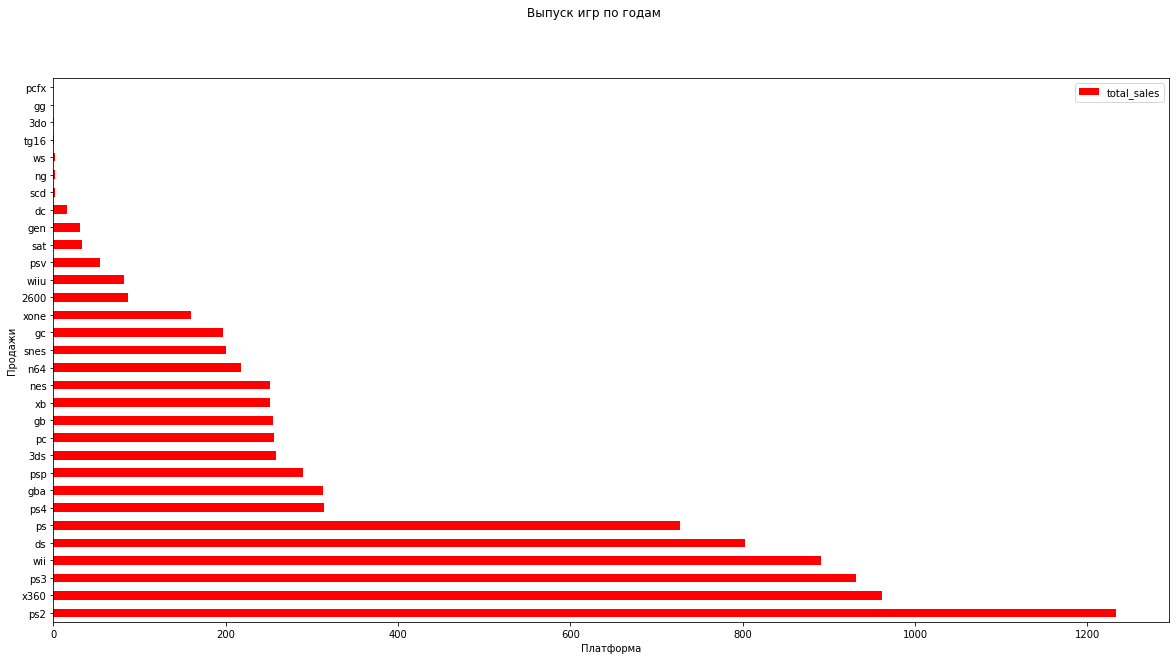

In [27]:
platforms.plot(kind='barh',
               figsize=(20,10),
               facecolor='r')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
#plt.grid(None) # найти как убрать сетку 
plt.suptitle('Выпуск игр по годам')
plt.show()


    
    - Лидируют: ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS']

### и построем распределение по годам.

In [28]:
games_by_year = games.groupby(['year_of_release', 'platform']).agg(
    {'total_sales': 'sum'}).reset_index()

In [29]:
games_by_year

,year_of_release,platform,total_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,nes,10.96
...,...,...,...
233,2016,psv,4.25
234,2016,wii,0.18
235,2016,wiiu,4.60
236,2016,x360,1.52


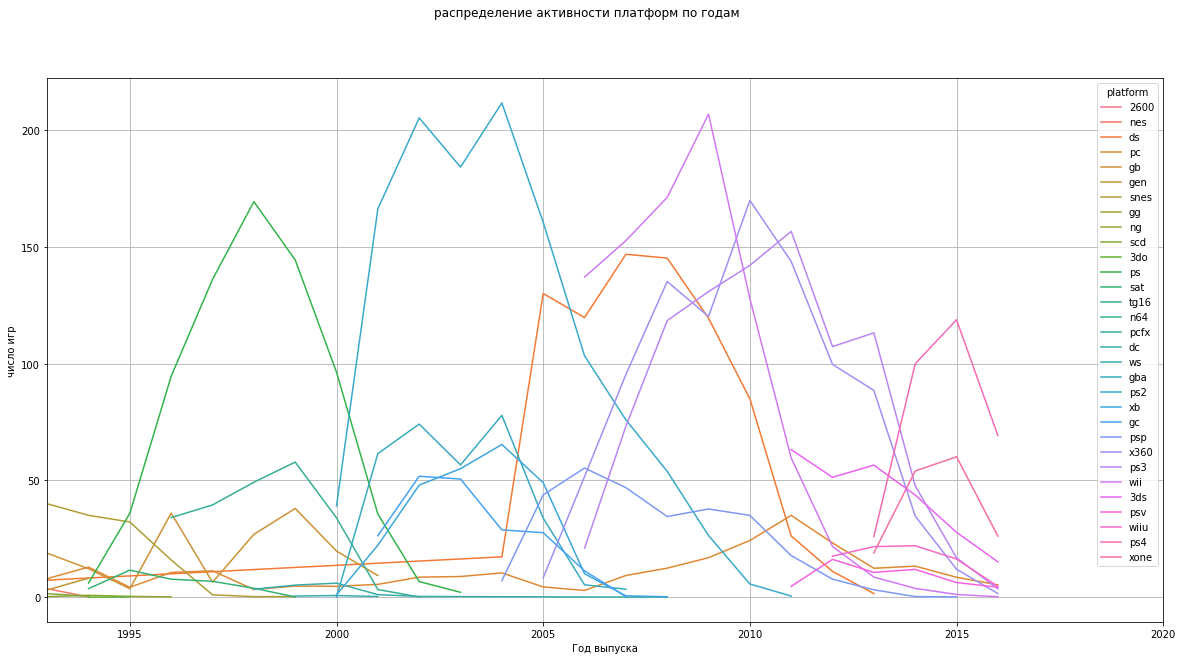

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(data = games_by_year,
             x = 'year_of_release',
             y = 'total_sales',
             hue = 'platform')
plt.xlabel('Год выпуска')
plt.ylabel('число игр')
plt.suptitle('распределение активности платформ по годам')
plt.xlim(1993,2020)
plt.grid()
plt.show()


    
    - большая активность наблюдалась в период с 2000-х по 2014 годы

 ### Выберем платформы с наибольшими суммарными продажами 

In [31]:
maxgames = games.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum').nlargest(6, 'total_sales') 


In [32]:
maxgames = pd.pivot_table(maxgames,
                          values = 'total_sales',
                          index = 'platform',# чтоб получить список платформ
                          aggfunc = np.sum).sort_values(
                                                       'total_sales', ascending=False)

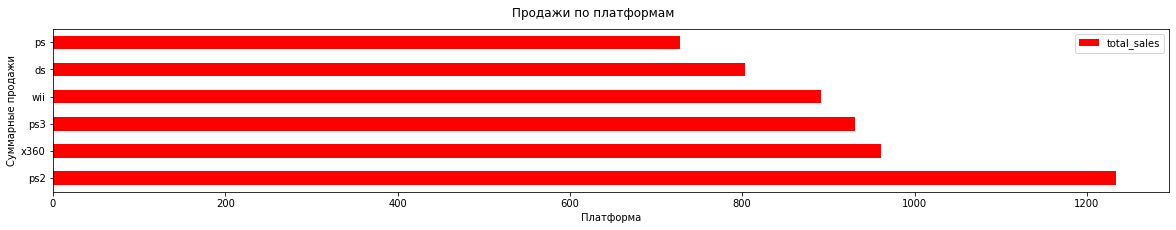

In [33]:
maxgames.plot(kind='barh',
              figsize=(20,3),
              facecolor='r')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.suptitle('Продажи по платформам')
plt.show()

In [34]:
maxgames2 = list(maxgames.index) # получим список платформ
maxgames2

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

In [35]:
maxgames2 = games[games['platform'].isin(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'])]

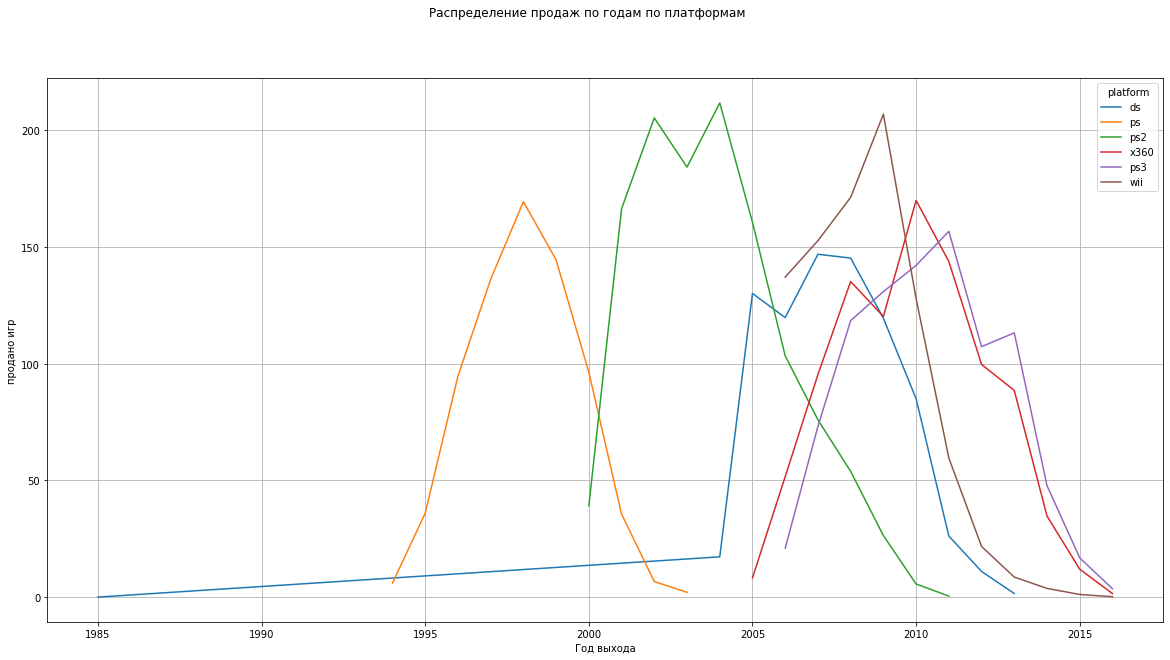

In [36]:
plt.figure(figsize=(20,10))
sns.lineplot(data = maxgames2.groupby(
    ['year_of_release', 'platform']).agg(
    {'total_sales': 'sum'}).reset_index(),x = 'year_of_release', y = 'total_sales', hue = 'platform')
plt.xlabel('Год выхода')
plt.ylabel('продано игр')
plt.suptitle('Распределение продаж по годам по платформам')
plt.grid()
plt.show()

6 лучших платформ:  'ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'

### За какой характерный срок появляются новые и исчезают старые платформы?

срок жизни одной платформы колеблется от 8 до 10 лет 

### Возьмем данные за соответствующий актуальный период. 

In [37]:
#уберем данные за предыдущие годs до 2014
games_actual = games.query('year_of_release >= 2014')
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


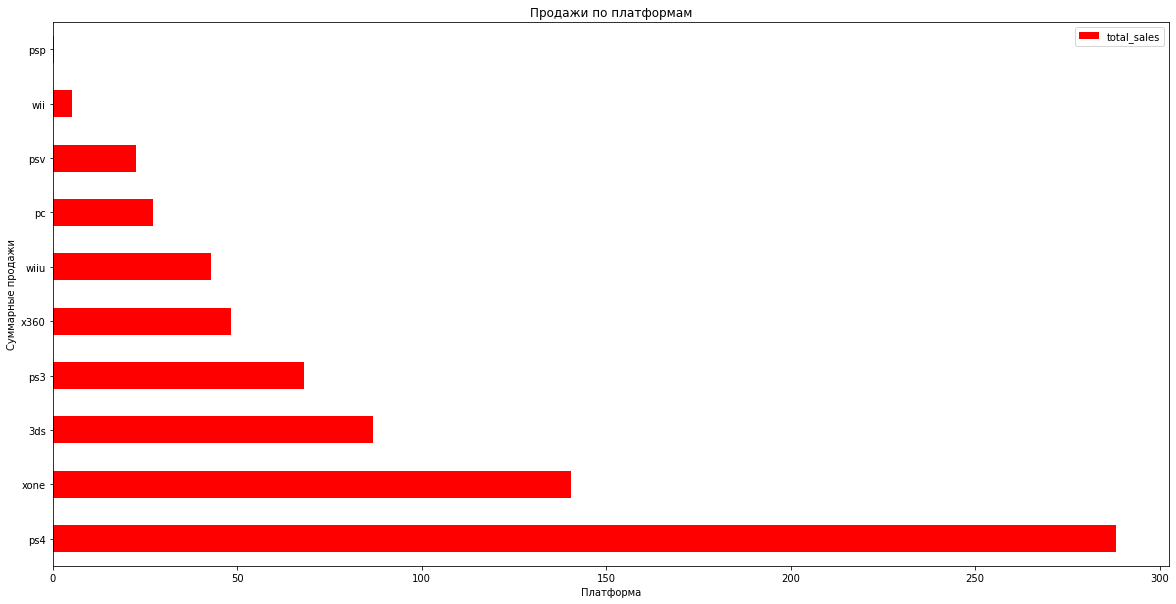

In [38]:
#платформы с наибольшими суммарными продажами

pd.pivot_table(games_actual,
               values = 'total_sales',
               index = 'platform',
               aggfunc = np.sum).sort_values(
                                             'total_sales', ascending=False).plot(
                                                                                    kind='barh',
                                                                                    title='Продажи по платформам',
                                                                                    figsize=(20,10),
                                                                                    facecolor='r')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

##### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [39]:
# лидирующие платформы соберем снова через свод

games_actual2 = games_actual.pivot_table(index='platform',
                                         values='total_sales',
                                         aggfunc='sum').nlargest(6, 'total_sales')


In [40]:
games_actual3 = list(games_actual2.index)
games_actual3

['ps4', 'xone', '3ds', 'ps3', 'x360', 'wiiu']

In [41]:
games_by_plat = games_actual.pivot_table(index='year_of_release',
                                         columns='platform',
                                         values='total_sales',
                                         aggfunc='sum')


In [42]:
games_actual3 = games_by_plat.loc[:, ['ps4', 'xone', '3ds', 'ps3', 'x360', 'wiiu']]

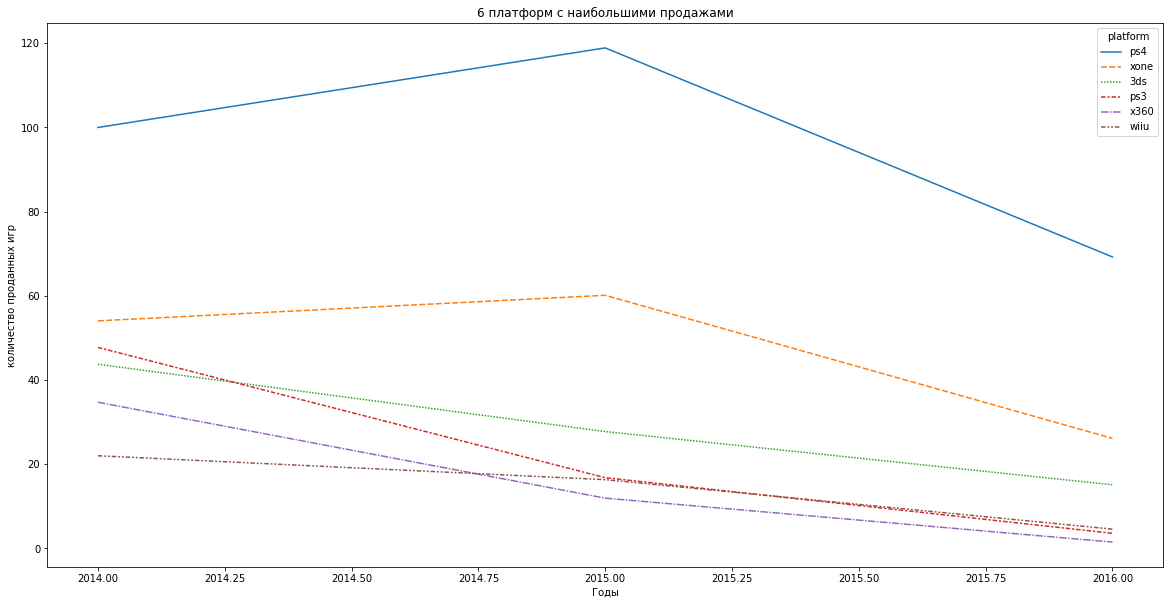

In [43]:
plt.figure(figsize=(20,10))
sns.lineplot(data = games_actual3)
plt.title('6 платформ с наибольшими продажами')
plt.xlabel('Годы')
plt.ylabel('количество проданных игр')
plt.show()


    
Современные лидеры:'ps4', 'xone', '3ds', 'ps3', 'x360', 'wiiu'
   

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [44]:
games_global = games[games['year_of_release'] >= 2014] 

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.0, 2.0)

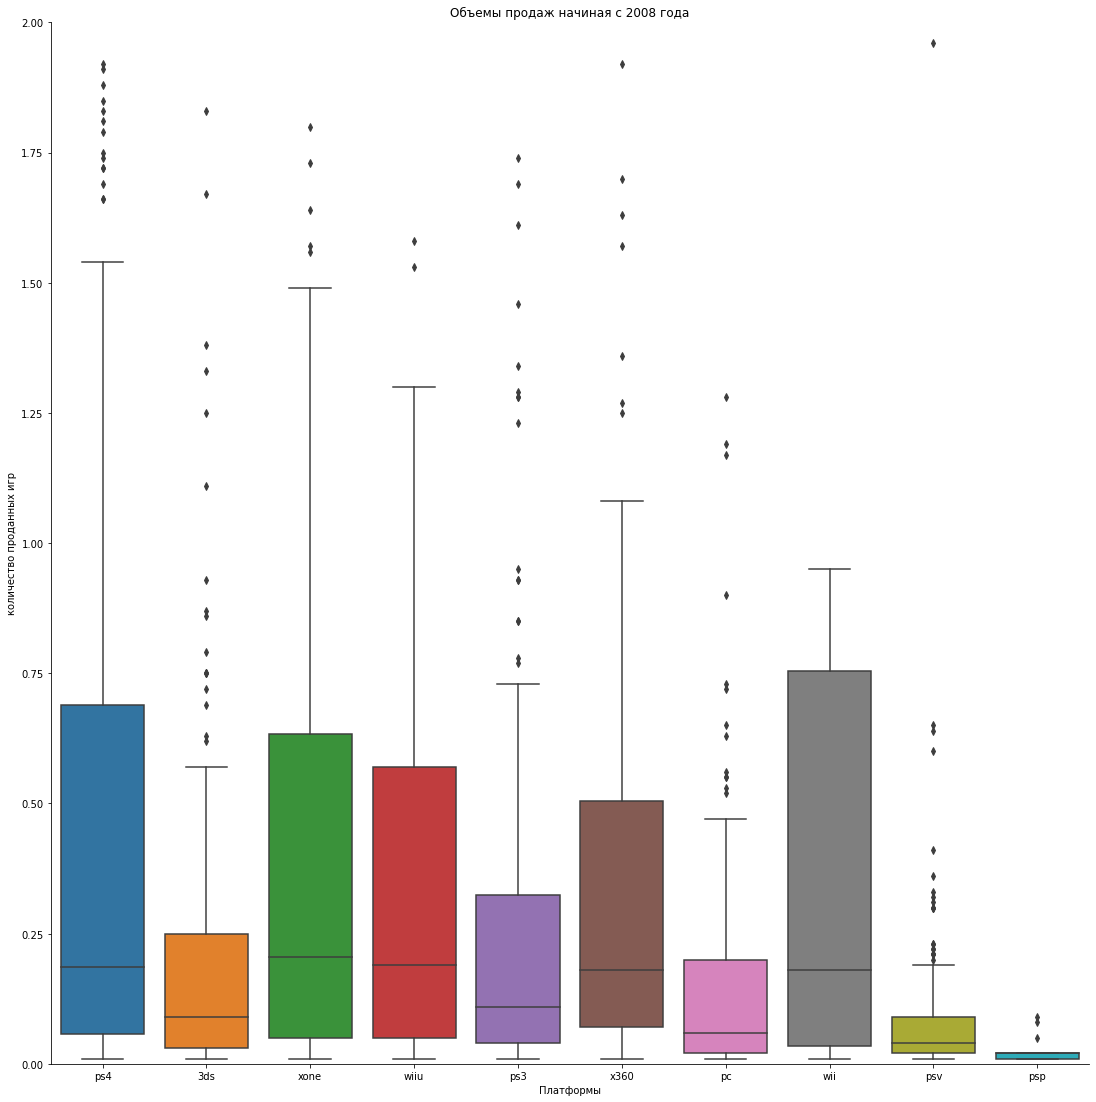

In [45]:

sns.catplot(x='platform', 
            y='total_sales', 
            kind='box', 
            data=games_global,size=15)
plt.title('Объемы продаж начиная с 2008 года')
plt.xlabel('Платформы')
plt.ylabel('количество проданных игр')
plt.ylim(0, 2)

In [46]:
games_global.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,981.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,5.995617,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,2.460934,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.100000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,6.800000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.700000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


In [47]:
boxplot_dgrm = games_global.groupby('platform').agg(
    {'total_sales':['sum', 'median','mean','min', 'max']}).reset_index()
boxplot_dgrm

platform total_sales                              
                   sum median      mean   min    max
0      3ds       86.68  0.090  0.408868  0.01  11.68
1       pc       27.05  0.060  0.179139  0.01   3.05
2      ps3       68.18  0.110  0.311324  0.01   5.27
3      ps4      288.15  0.185  0.766356  0.01  14.63
4      psp        0.36  0.020  0.027692  0.01   0.09
5      psv       22.40  0.040  0.075932  0.01   1.96
6      wii        5.07  0.180  0.460909  0.01   2.01
7     wiiu       42.98  0.190  0.588767  0.01   7.09
8     x360       48.22  0.180  0.434414  0.01   4.28
9     xone      140.36  0.205  0.615614  0.01   7.39

 наибольшее число игр продали x360, ps3, ps4, xone, wii, wiiu

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

In [48]:
#Для этой части исследования возьмем - ps3

In [49]:
ps3 = games_global.query('platform == "ps3" and (user_score != 0)')

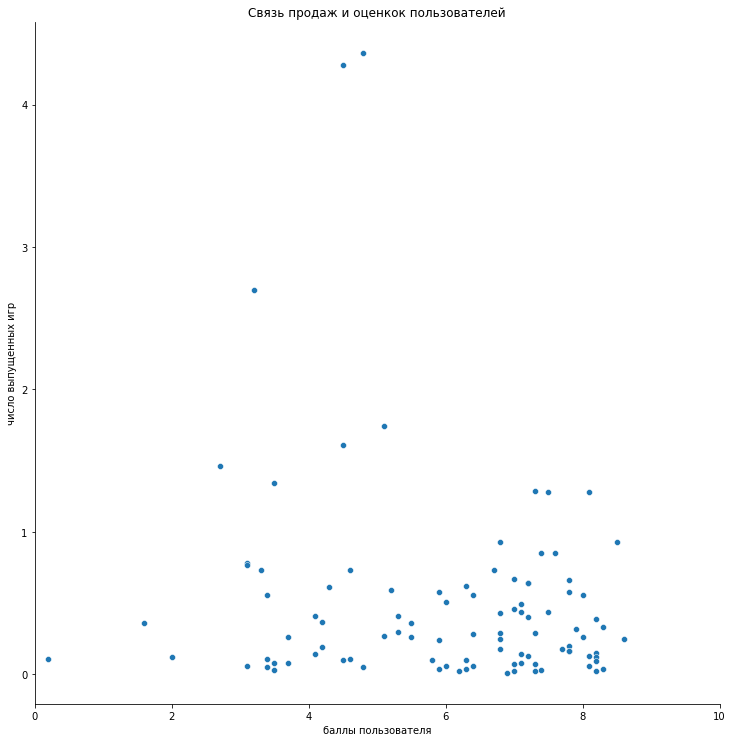

In [50]:
# Диаграммы отценок пользователей

sns.relplot(data=ps3, 
            x='user_score', 
            y='total_sales',
            height=10)
plt.title('Связь продаж и оценкок пользователей')
plt.xlabel('баллы пользователя')
plt.ylabel('число выпущенных игр')
plt.xlim(0, 10)
plt.show()

In [51]:
score_user_cor = (ps3['user_score']).corr(ps3['total_sales'])
score_user_cor # линейной связи нет

-0.16676141347662118

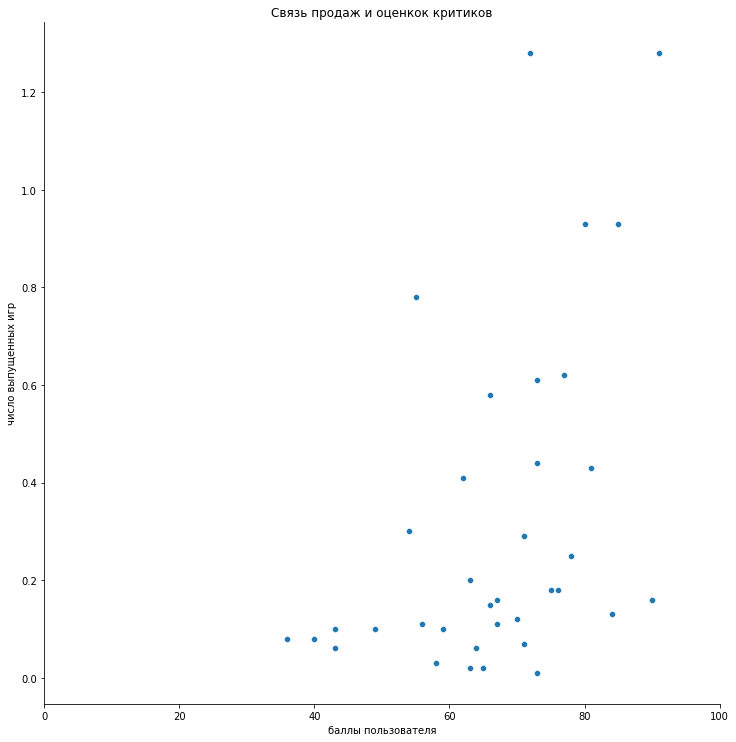

In [52]:
#ценки критиков и продаж ps3
sns.relplot(data=ps3, 
            x='critic_score', 
            y='total_sales',
            height=10)
plt.title('Связь продаж и оценкок критиков')
plt.xlabel('баллы пользователя')
plt.ylabel('число выпущенных игр')
plt.xlim(0, 100)

plt.show()

In [53]:
score_user_crit = ps3['critic_score'].corr(ps3['total_sales'])
score_user_crit # линейной связи нет

0.44657460493190704

### Соотнесем выводы с продажами игр на других платформах.

In [54]:
for plt in ['ps4', 'xone', '3ds', 'x360', 'wiiu']: 
    platf = games_global.query('platform == @plt and (user_score != 0)')
    crr = round(platf['critic_score'].corr(platf['total_sales']), 2)
    print('Воздейсвие оценок критиков на продажи', plt, crr)
    
for plt in ['ps4', 'xone', '3ds', 'x360', 'wiiu']:
    platf = games_global.query('platform == @plt and (user_score != 0)')
    crr = round(platf['user_score'].corr(platf['total_sales']), 2)
    print('Воздейсвие оценок пользователей на продажи', plt, crr)

Воздейсвие оценок критиков на продажи ps4 0.4
Воздейсвие оценок критиков на продажи xone 0.42
Воздейсвие оценок критиков на продажи 3ds 0.28
Воздейсвие оценок критиков на продажи x360 0.53
Воздейсвие оценок критиков на продажи wiiu 0.38
Воздейсвие оценок пользователей на продажи ps4 -0.04
Воздейсвие оценок пользователей на продажи xone -0.07
Воздейсвие оценок пользователей на продажи 3ds 0.22
Воздейсвие оценок пользователей на продажи x360 -0.14
Воздейсвие оценок пользователей на продажи wiiu 0.41


 Согласно диаграмме рассеянья отзывы пользователей не влияют на продажи как и отзывы критиков. Согласно вычисленным покащателям корреляции 0.16 - связь продаж и отзывов пользователей и 0.44 - связь продаж и отзывов критиков.

По остальным платформам так же нет влияния критиков и пользователей

### Посмотрим на общее распределение игр по жанрам. 

In [55]:
total_genre =pd.DataFrame(games_global,columns=['year_of_release','genre','total_sales'])

In [56]:
total_genre = total_genre.groupby(['year_of_release','genre']).agg(
    {'total_sales':'mean'}).sort_values(by = ['year_of_release','total_sales'])
total_genre 



total_sales
year_of_release genre                    
2014            adventure        0.074267
                strategy         0.122500
                puzzle           0.212857
                simulation       0.507273
                role-playing     0.512584
                action           0.517181
                misc             0.556667
                racing           0.617037
                fighting         0.689130
                sports           0.836111
                platform         0.881000
                shooter          1.387447
2015            strategy         0.115625
                puzzle           0.118333
                adventure        0.151111
                action           0.284664
                misc             0.296667
                fighting         0.376190
                simulation       0.377333
                racing           0.448333
                platform         0.465385
                role-playing     0.482564
                sports           0.692203
                shooter          1.985588
2016            puzzle           0.010000
                adventure        0.068214
                misc             0.081250
                strategy         0.086923
                simulation       0.105000
                racing           0.116250
                action           0.169157
                platform         0.215333
                fighting         0.279375
                role-playing     0.336667
                sports           0.489375
                shooter          0.813191

In [57]:
total_genre.index

MultiIndex([(2014,    'adventure'),
            (2014,     'strategy'),
            (2014,       'puzzle'),
            (2014,   'simulation'),
            (2014, 'role-playing'),
            (2014,       'action'),
            (2014,         'misc'),
            (2014,       'racing'),
            (2014,     'fighting'),
            (2014,       'sports'),
            (2014,     'platform'),
            (2014,      'shooter'),
            (2015,     'strategy'),
            (2015,       'puzzle'),
            (2015,    'adventure'),
            (2015,       'action'),
            (2015,         'misc'),
            (2015,     'fighting'),
            (2015,   'simulation'),
            (2015,       'racing'),
            (2015,     'platform'),
            (2015, 'role-playing'),
            (2015,       'sports'),
            (2015,      'shooter'),
            (2016,       'puzzle'),
            (2016,    'adventure'),
            (2016,         'misc'),
            (2016,     'stra

<AxesSubplot:title={'center':'Жанры'}, xlabel='year_of_release,genre'>

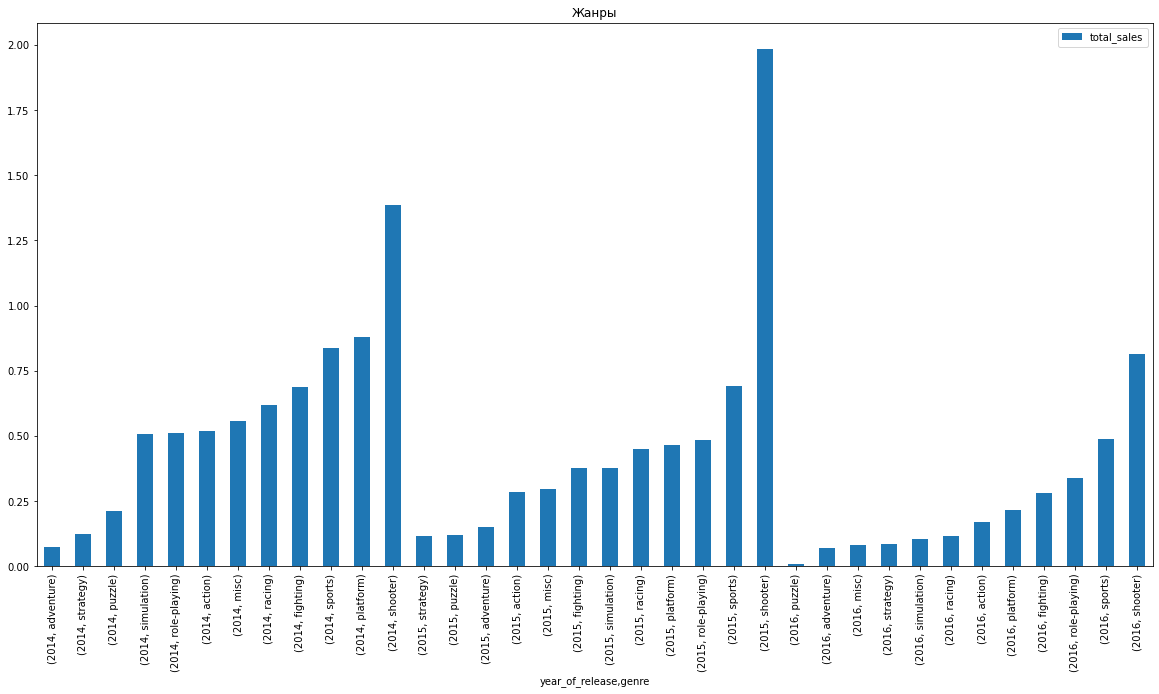

In [58]:
total_genre.plot(kind='bar',
                 legend=True,
                 figsize=(20, 10),
                 title='Жанры')
#plt.xlabel('Жанр')
#plt.show()

в совремнное время в топе жанры Sports,Shooter,Role-Playing,Platform. Самые прибыльные жанры Shooter и Sports,  в 2016 году увеличилась прибыльность жанра Role-Playing

## Составим портрет пользователя каждого региона. Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### ТОП-5 платформ

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


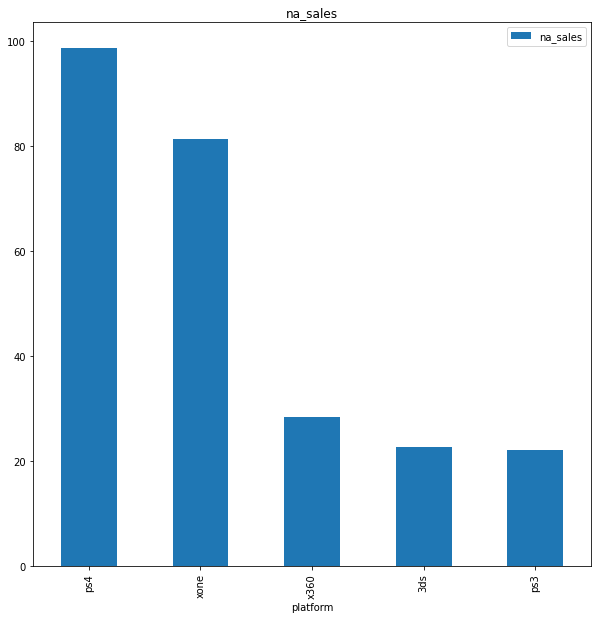

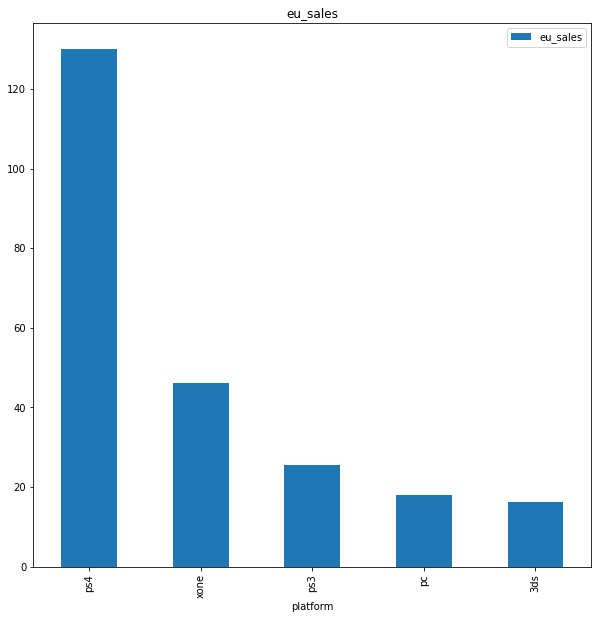

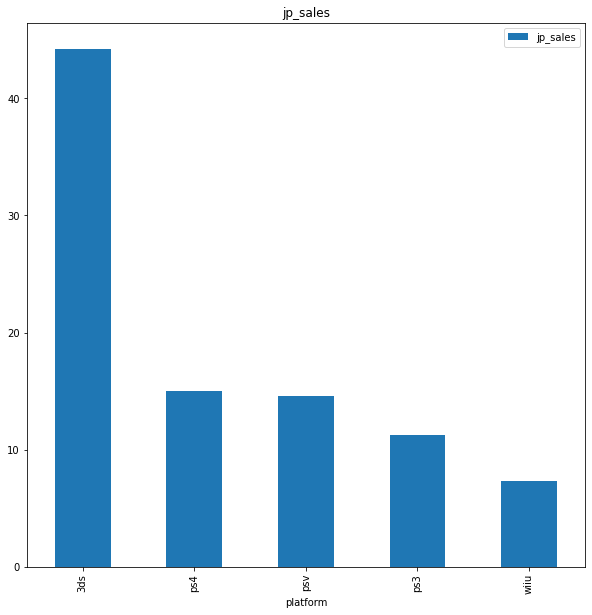

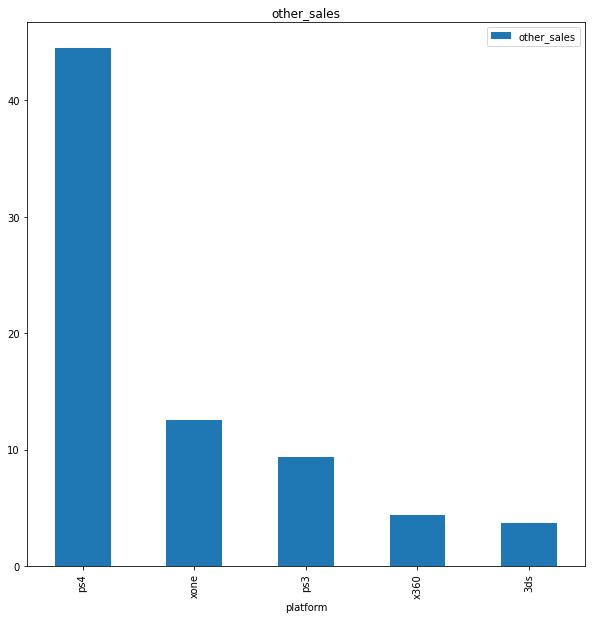

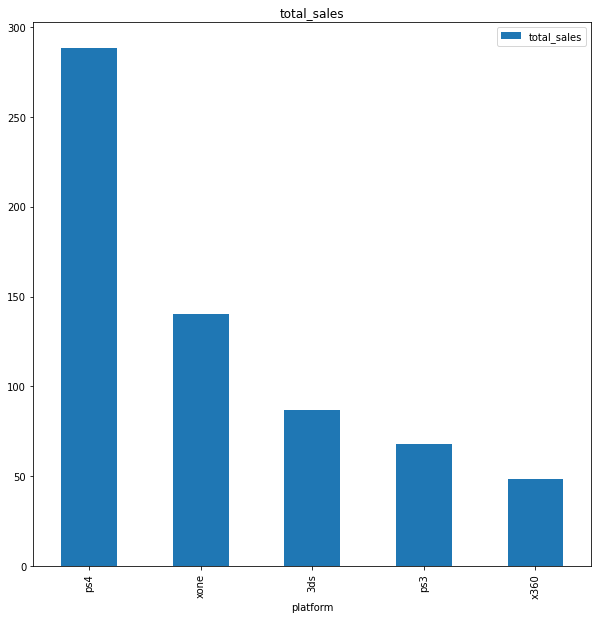

In [59]:
def top5(data, plat):
    for column in list(data):
        if 'sales' in column:
            print(data.groupby(plat).agg({column:'sum'}).sort_values(
                column, ascending=False).head().plot(title=column,
                                                     kind='bar',
                                                     legend=True,
                                                     figsize=(10, 10)))
            #plt.xlabel(plat)
            #plt.show()

top5(games_global, 'platform')

### Самые популярные жанры (топ-5)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


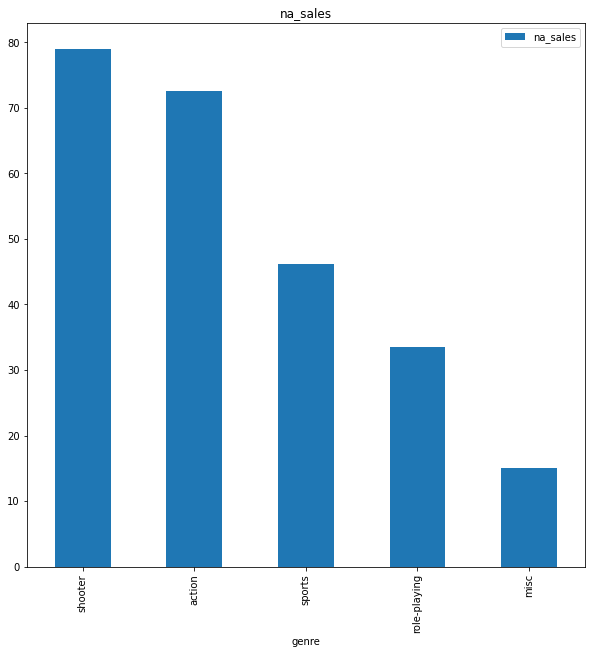

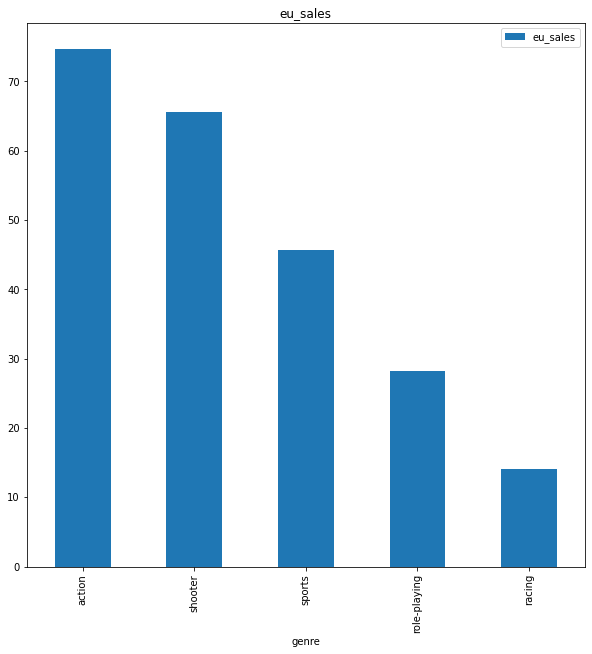

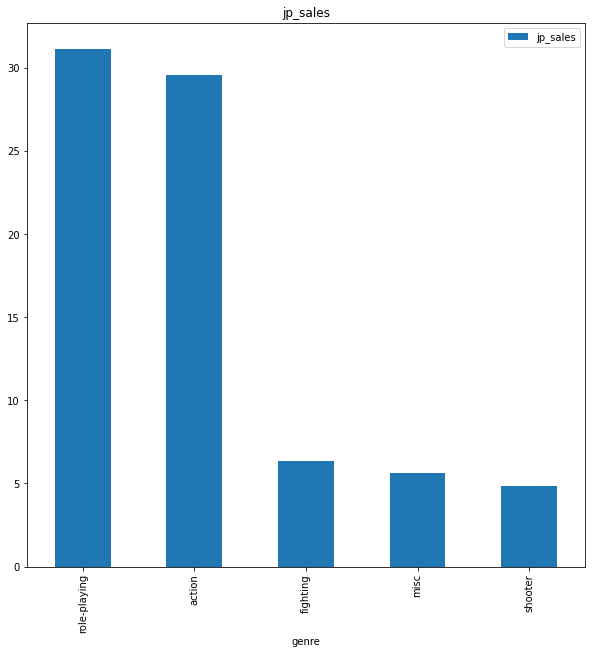

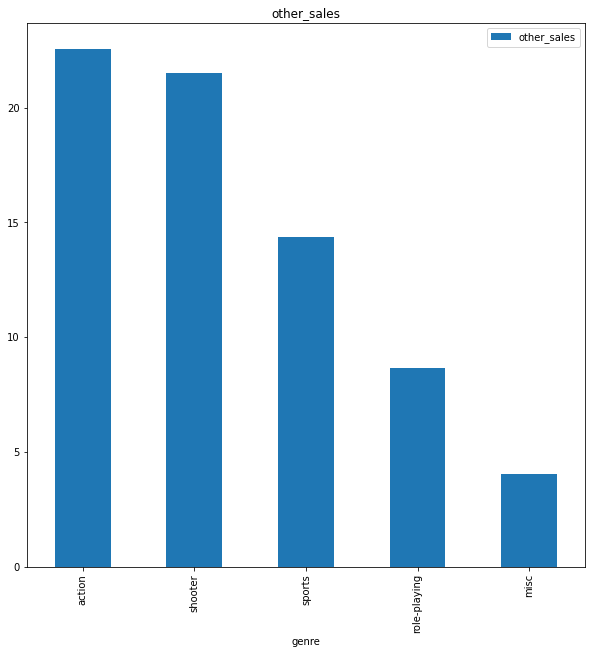

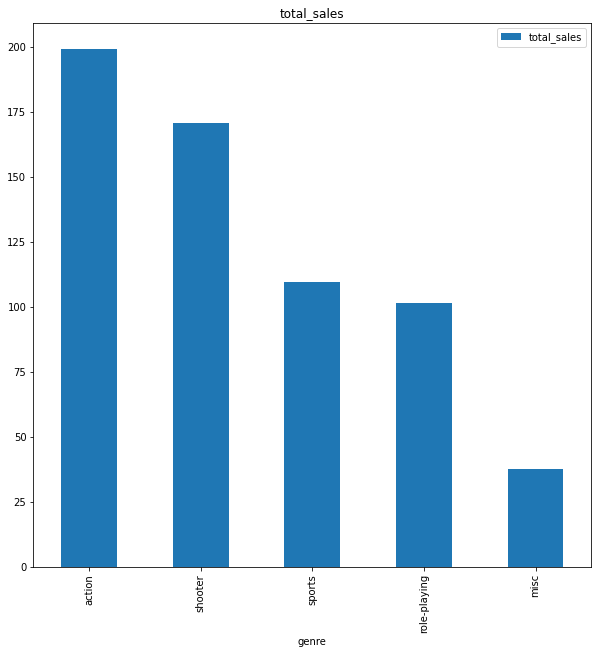

In [60]:
top5(games_global, 'genre')


Самые попоулярные платформы по регионам:
- na: ps4, xone, x360
- eu: ps4, xone, ps3
- jp: 3ds, ps4, psv
- Other : ps4, xone, ps3

наиболее популярна платформа PS4. Она лидер на всех рынках. Затем Хone


Самые попоулярные жанры по регионам:
- na: Action, Sports,  и Shooter
- eu: Action, Sports,  и Shooter
- jp: Rolle-Playing, Action, Fighting
- Other : Action, Sports,  и Shooter

наиболее популярные жанры Action, Sports. Они на всех рынках В японии самый популярный жанр - Rolle-Playing, Action

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [61]:
games_global

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [62]:
#games_filter = games_global[games_global['year_of_release'] != 1900]
games_global['rating'].value_counts()

T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

In [63]:
# добавим столбец с описанием рейтинга
def rating_comment(row):
    if row['rating'] == 'AO':return 'Для взрослых'
    elif row['rating'] == 'E':return 'без ограничений'
    elif row['rating'] == 'E10+':return '10+'
    elif row['rating'] == 'EC':return 'Для детей'
    elif row['rating'] == 'K-A':return 'без ограничений '
    elif row['rating'] == 'M':return '17+'
    elif row['rating'] == 'RP':return 'Рейтинг ожидается'
    elif row['rating'] == 'T':return '13-19 лет'
    return 'Unknown'

games_global['rating_comment'] = games_global.apply(rating_comment, axis=1)
#games_filter.head()

/tmp/ipykernel_238/3317702553.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_global['rating_comment'] = games_global.apply(rating_comment, axis=1)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


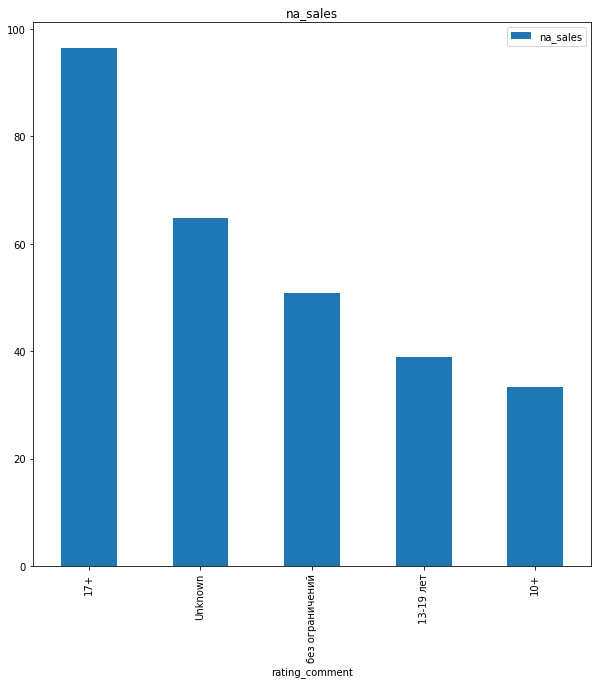

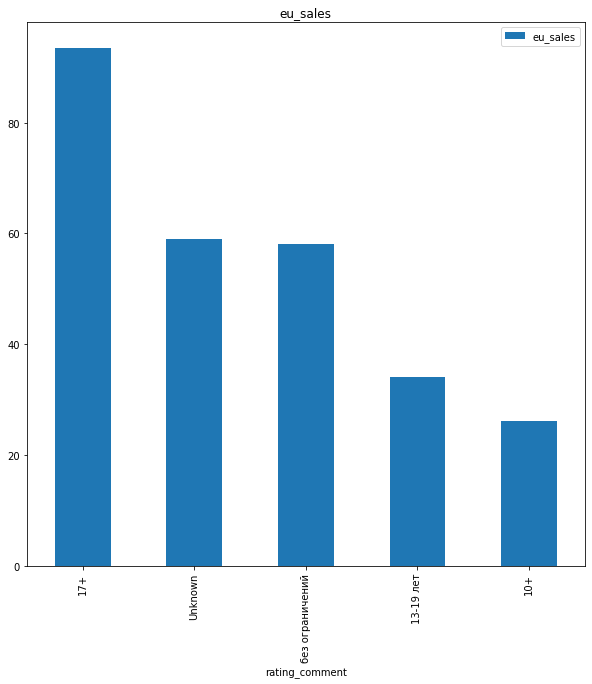

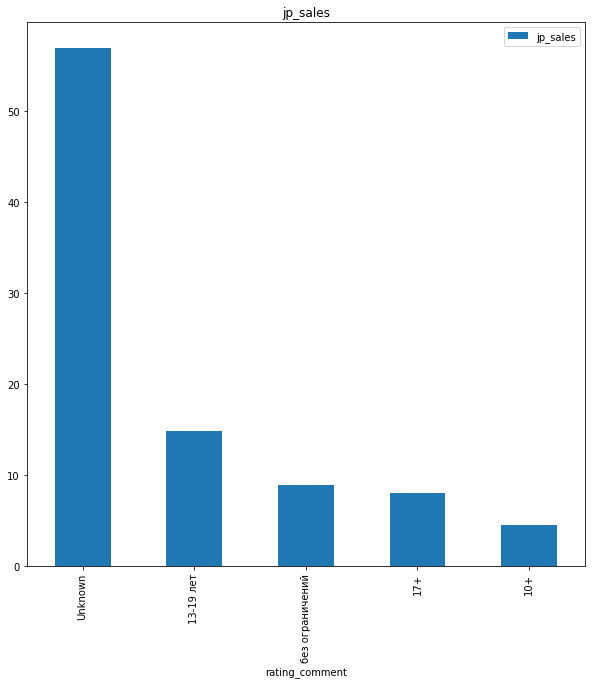

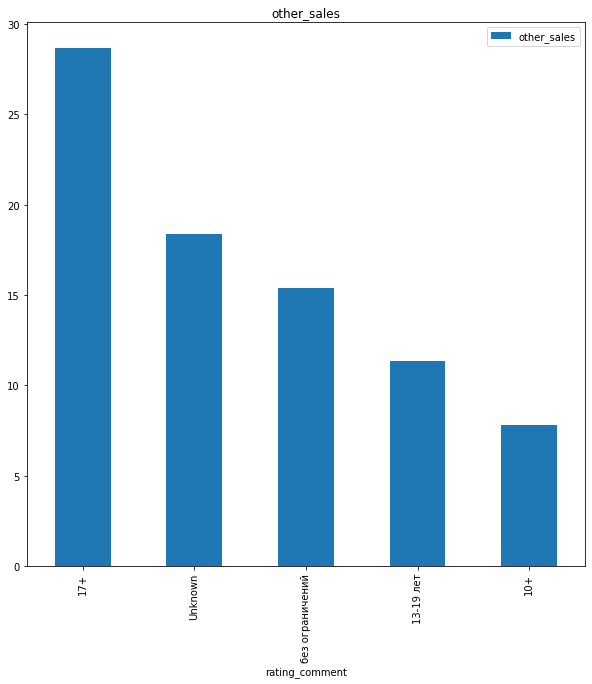

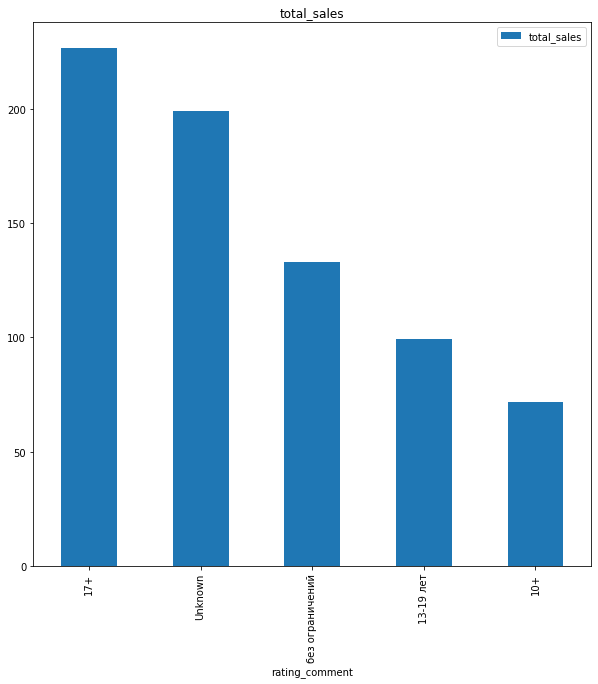

In [64]:
top5(games_global, 'rating_comment')

In [65]:
sales_by_rating = games_global.groupby('rating_comment').agg(
    {'rating':'count',
     'na_sales':'sum',
     'eu_sales':'sum',
     'jp_sales':'sum'})
sales_by_rating

,rating,na_sales,eu_sales,jp_sales
rating_comment,,,,
10+,185,33.23,26.16,4.46
13-19 лет,271,38.95,34.07,14.78
17+,265,96.42,93.44,8.01
Unknown,0,64.72,58.95,56.90
без ограничений,219,50.74,58.06,8.94


In [66]:
corr_rating_sales = games_global[['rating', 'total_sales']].corr()
corr_rating_sales

,total_sales
total_sales,1.0


 Да, рейтинг влияет. в  США и европе Action и Shooter  получают рейтинги для взрослых, а следовательно и продажи этих игр выше, как например в США и Европе, так же популярны игры без рейитинга. В Японии большие продажи приходятся на игры без рейтинга ESRB

Портрет:

- США - Клиент играет в ps4, xone, в жанре Action, Sports делает выбор не опираясь на оценки критиков и остальных пользователей, но обращает внимание на рейтинг ESRB, и выбирает либо без рейтинга либо 17+
- Европа - Клиент играет в PS4, Хone, в жанре Action, Sports делает выбор не опираясь на оценки критиков и остальных пользователей, но обращает внимание на рейтинг ESRB, и выбирает либо без рейтинга либо 17+
- Япония - Клиент играет в 3DS, в жанре Rolle-Playing, Action делает выбор не опираясь на оценки критиков и остальных пользователей, но обращает внимание на рейтинг ESRB, и выбирает либо без рейтинга либо 13-19 лет




## Шаг 5. Проверм гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Гипотезы:
- H0: Средние пользовательские рейтинги платформ Xbox One и PC  одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [67]:
games_global['user_score'].isna().sum()

708

In [68]:
Xone = games_global.query('platform == "xone" and (user_score != 0)')['user_score'].dropna()
pc = games_global.query('platform == "pc" and (user_score != 0)')['user_score'].dropna()
# удалим пропуски в XOne и PC иначе t-тест может сработать не корректно

In [69]:
alpha = 0.05 # зададим значение альфа в 5%

In [70]:
print(np.var(Xone,ddof=1))
print(np.var(pc,ddof=1))

1.8910066518847013
2.901154315133451


In [71]:
print(Xone.mean())
print(pc.mean())

6.594545454545456
6.298360655737705


Дисперсии наших выборок не равны! значение equal_var=False

In [72]:

results = st.ttest_ind(
    Xone, 
    pc, 
    equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергнуть нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу " Средние пользовательские рейтинги платформ xbox One и PC одинаковые"

### Средние пользовательские рейтинги жанров Action и Sports разные.

Гитпотезы:

- H0: Средние пользовательские рейтинги жанров Action и Sports  одинаковые

- H1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые

In [73]:
action = games_global.query('genre == "action" and (user_score != 0)')['user_score'].dropna()
sports = games_global.query('genre == "sports" and (user_score != 0)')['user_score'].dropna()

In [74]:
print(action.mean())
print(sports.mean())

6.760606060606061
5.2251968503937


In [75]:
print(np.var(action,ddof=1))
print(np.var(sports,ddof=1))

1.8984766584766581
3.446979127609048


Дисперсии наших выборок не равны! значение equal_var=False

In [76]:
alpha = 0.05
results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о том что Средние пользовательские рейтинги жанров Action и Sports одинаковые

## Вывод



- согласно графикам, как динамика в выпуске игр начинает меняться с 1993 года. Можем считать это переходным периодом от зачатия к первым шагам развития рынка компьютерного рынка. Анализ же проводился на даннных с 2014 годв

- согласно исследованию лидеры-платформы  Х360, PS3, PS4, Xone, Wii, WiiU

- исходя из графика, большая активность наблюдалась в период с 2000-х по 2014 годы. 

- с 2011 года количество выпускаемых игр начинает снижаться

- если выделить 6 лучших платформ, тов этот список попадут такие платформы как : Х360, PS3, PS4, Xone, Wii, WiiU. 

- срок жизни одной платформы колеблется от 8 до 10 лет

- лидерами по продажам в последнее время являются современные платформы такие как Х360, PS3, PS4, Xone, Wii, WiiU

- наибольшее число игр после 214 года продали такие платформы, как Х360, PS3, PS4, Xone, Wii, WiiU

- согласно диаграмме рассеянья отзывы пользователей и критиков не влияют на продажи линейно ни на каких платформах

- Однозначно выделяются жанры Action, Sports,Shooter,Role-Playing,Platform.  Самые попоулярные платформы по регионам:
1. na: X360, PS2 и Wii
2. eu: PS3, PS2, X360
3. jp: DS, PS, PS2
4. Other : PS2, PS3, X360

- наиболее популярна среди клиентов платформа PS2. Она входит в лидеры среди клиентов всех рынков. 
- отстает X360. она не популярна лишь в Японии. Там предпочитают 3DS, в жанре Rolle-Playing Action

- Самые попоулярные жанры по регионам:
1. na: Action, Sports, и Shooter
2. eu: Action, Sports, и Shooter
3. jp: Rolle-Playing, Action, Sports
4. Other : Action, Sports, и Shooter

- наиболее популярна среди клиентов жанры Action, Sports. Они входит в лидеры среди клиентов всех рынков. 
- отстает Shooter. он не популярна лишь в Японии где предпочитаю Rolle-Playing и Action

- при исследовании влияния возрастного рейтингов на продажи мы можем сказать, что рейтинг влияет. Action и Shooter получают рейтинги для взрослых, а следовательно и продажи этих игр выше, как например в США и Европе.

## Рекомендации
1. При планировании продаж на 2017 год необходимо ориентироваться на игровые платформу PS4 в Европе и США и DS3 в Японии. Она входит в лидеры среди клиентов всех рынков. Немного отстает Хone. В Японии PS4  не популярна лишь в Японии

2. Наиболее популярные жанры в Европе и. США Action, Sports. Они входит в лидеры среди клиентов всех рынков. В Японии самый популярный жанр - Rolle-Playing, Action

4. Самые прибыльные жанры Shooter и Sports,  а к 2016 году увеличилась прибыльность жанра Role-Playing

5. Самые хорошие продажи в рейтинге 17+ либо без рейтинга. В японии популярные рейтинги 13-19 лет либо без рейтинга.


Портрет клиента:

- США - Клиент играет в PS4, Хone, в жанре Action, Sports делает выбор не опираясь на оценки критиков и остальных пользователей, но обращает внимание на рейтинг ESRB, и выбирает либо без рейтинга либо 17+
- Европа - Клиент играет в PS4, Хone, в жанре Action, Sports делает выбор не опираясь на оценки критиков и остальных пользователей, но обращает внимание на рейтинг ESRB, и выбирает либо без рейтинга либо 17+
- Япония - Клиент играет в 3DS, в жанре Rolle-Playing, Action делает выбор не опираясь на оценки критиков и остальных пользователей, но обращает внимание на рейтинг ESRB, и выбирает либо без рейтинга либо 13-19 лет



- Так же были проверены гипотезы и::
1. Не получилось отвергнуть нулевую гипотезу " Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
2. Отвергаем нулевую гипотезу о том что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые



